In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

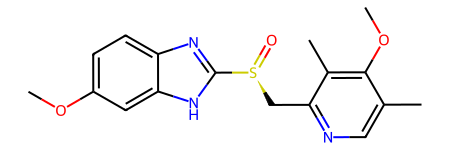

In [2]:
m = Chem.MolFromSmiles('COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C')
m

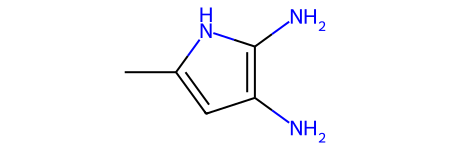

In [3]:
m = Chem.MolFromSmiles('[H]c1c(N([H])[H])c(N([H])[H])n([H])c1C([H])([H])[H]')
m

In [12]:
from rdkit.Chem import AllChem
m = Chem.AddHs(m)
AllChem.EmbedMolecule(m)
conf = m.GetConformer()

coords = [list(conf.GetAtomPosition(i)) for i in range(m.GetNumAtoms())]
coords

[[0.3821583875025074, 1.1678757253144565, -0.14273745343428673],
 [-0.9057688932454566, 0.6492649458437992, -0.09562949236185826],
 [-2.100520325056501, 1.4175975558922058, -0.1945714626266625],
 [-0.8559115761352852, -0.7242557198344036, 0.06161127786109308],
 [-1.9306184882378403, -1.6443740912670366, 0.15654140092592148],
 [0.46642114062570605, -1.040335877921192, 0.11009506772036194],
 [1.2034764456574338, 0.05581849722648197, -0.008103529219673118],
 [2.7055227449075465, 0.10506446281128093, 0.0003710742164059063],
 [0.7051647095474215, 2.1840389855098583, -0.25567603779254894],
 [-2.0591482594097528, 2.4658006040602074, -0.027448058349107206],
 [-3.007754672338713, 0.9406005687933391, -0.431218800469724],
 [-2.481682966002657, -1.6593603430235713, 1.0381395477688005],
 [-2.207152546626121, -2.307421899926203, -0.5962681322612334],
 [0.8436957695356999, -2.012611584025255, 0.22462264240813248],
 [3.0220977572812653, -0.19306247167766413, 1.0232153724899038],
 [3.161397930651433, -

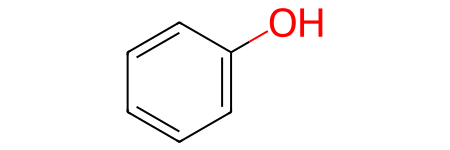

In [4]:
molblock = """phenol
  Mrv1682210081607082D          

  7  7  0  0  0  0            999 V2000
   -0.6473    1.0929    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3618    0.6804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3618   -0.1447    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6473   -0.5572    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0671   -0.1447    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0671    0.6804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7816    1.0929    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  3  4  1  0  0  0  0
  4  5  2  0  0  0  0
  5  6  1  0  0  0  0
  1  6  2  0  0  0  0
  6  7  1  0  0  0  0
M  END
"""
m = Chem.MolFromMolBlock(molblock)
m

In [5]:
m.GetConformer().Is3D()

False

In [8]:
m_h = Chem.MolFromMolBlock(molblock, removeHs=False)

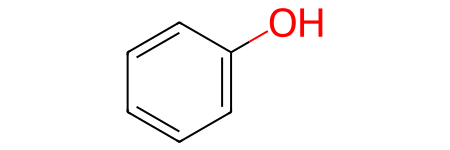

In [9]:
m_h

In [10]:
from rdkit import Chem

# Load a molecule (SMILES or mol file)
mol = Chem.MolFromSmiles('c1ccccc1O')  # Phenol

# Iterate through bonds
for bond in mol.GetBonds():
    a1 = bond.GetBeginAtomIdx()
    a2 = bond.GetEndAtomIdx()
    bond_type = bond.GetBondType()
    is_aromatic = bond.GetIsAromatic()
    
    print(f"Bond: {a1} - {a2}")
    print(f"  Type: {bond_type}")
    print(f"  Aromatic: {is_aromatic}")
    print("---")


Bond: 0 - 1
  Type: AROMATIC
  Aromatic: True
---
Bond: 1 - 2
  Type: AROMATIC
  Aromatic: True
---
Bond: 2 - 3
  Type: AROMATIC
  Aromatic: True
---
Bond: 3 - 4
  Type: AROMATIC
  Aromatic: True
---
Bond: 4 - 5
  Type: AROMATIC
  Aromatic: True
---
Bond: 5 - 6
  Type: SINGLE
  Aromatic: False
---
Bond: 5 - 0
  Type: AROMATIC
  Aromatic: True
---


In [12]:
[bond for bond in mol.GetBonds()]

In [4]:
all_molecules = []
with open('data\gdb11_size07.smi', 'r') as fin:
    for l in fin:
        smi = l.strip()
        m = Chem.MolFromSmiles(smi)
        all_molecules.append(m)

<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
C:\Users\adith\AppData\Local\Temp\ipykernel_30080\2728963629.py:2: SyntaxWarning: invalid escape sequence '\g'
  with open('data\gdb11_size07.smi', 'r') as fin:


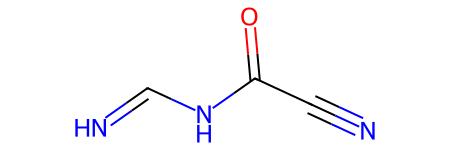

In [15]:
all_molecules[2323]

In [16]:
from rdkit.Chem import PandasTools

In [19]:
len(all_molecules[:100])

100

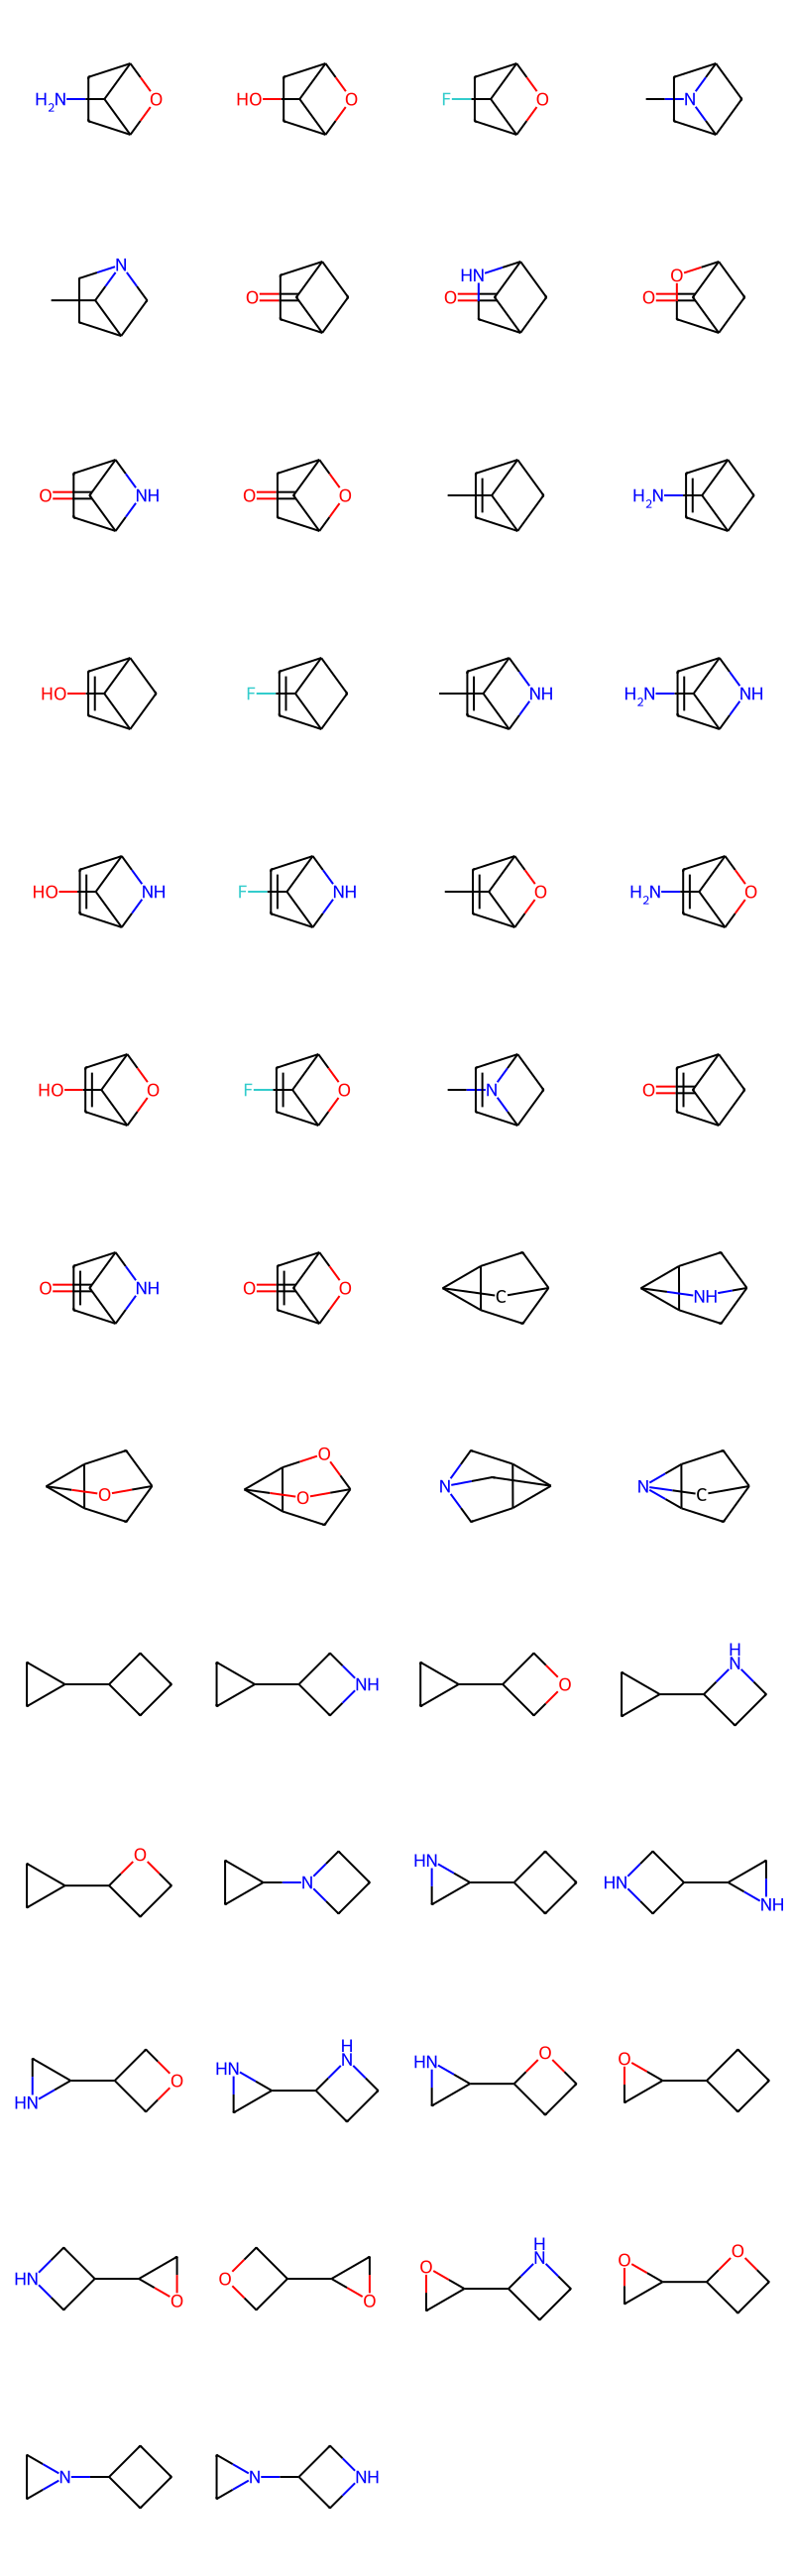

In [24]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(all_molecules[-100:-1], molsPerRow=4, subImgSize=(200,200))


In [27]:
mol = all_molecules[3421]

bonds = mol.GetBonds()

bond_list = []
for bond in bonds:
    bond_info = {
        'atom1': bond.GetBeginAtomIdx(),
        'atom2': bond.GetEndAtomIdx(),
        'bond_type': str(bond.GetBondType()),
        'is_aromatic': bond.GetIsAromatic(),
        'is_in_ring': bond.IsInRing()
    }
    bond_list.append(bond_info)

# Print the result
for b in bond_list:
    print(b)

{'atom1': 0, 'atom2': 1, 'bond_type': 'SINGLE', 'is_aromatic': False, 'is_in_ring': False}
{'atom1': 1, 'atom2': 2, 'bond_type': 'DOUBLE', 'is_aromatic': False, 'is_in_ring': False}
{'atom1': 1, 'atom2': 3, 'bond_type': 'SINGLE', 'is_aromatic': False, 'is_in_ring': False}
{'atom1': 3, 'atom2': 4, 'bond_type': 'SINGLE', 'is_aromatic': False, 'is_in_ring': False}
{'atom1': 3, 'atom2': 5, 'bond_type': 'SINGLE', 'is_aromatic': False, 'is_in_ring': False}
{'atom1': 5, 'atom2': 6, 'bond_type': 'DOUBLE', 'is_aromatic': False, 'is_in_ring': False}


In [28]:
mol = all_molecules[1234]

In [29]:
from rdkit.Chem import AllChem

mol = Chem.AddHs(mol)

# 3D coords:
AllChem.EmbedMolecule(mol)

0

In [30]:
conf = mol.GetConformer()

In [31]:
coords = []

for i in range(mol.GetNumAtoms()):
    pos = conf.GetAtomPosition(i)
    coords.append([pos.x, pos.y, pos.z])

In [32]:
coords

[[-1.9908616850688265, 0.73389284851279, 0.13087978883704066],
 [-0.8366419451924227, -0.17536242772467264, -0.3008808968618086],
 [0.3433659274094388, 0.5851854680549058, -0.12571900201043462],
 [1.6173177045393825, 0.0936110977918264, -0.4155507751448857],
 [2.231209555434999, -0.6916476479343755, 0.4602237061460444],
 [3.4664442655102414, -1.208868638835308, 0.25435264225376514],
 [1.618009086529775, -1.015566094368357, 1.637752253018614],
 [-1.9181049805503927, 1.6958181435192332, -0.39013078072765556],
 [-2.9766656148234536, 0.2908449749851193, -0.10840374419328906],
 [-1.8492755044969502, 0.915575681859673, 1.2133902537710022],
 [-0.8370007069999315, -1.0894062521055106, 0.3363299960684088],
 [-1.008966584370023, -0.45813310437861743, -1.3564966982827398],
 [2.141170482078169, 0.32405595062319603, -1.335746742874085]]

In [38]:
species = [atom.GetSymbol() for atom in mol.GetAtoms()]
species

['C', 'C', 'O', 'C', 'C', 'F', 'F', 'H', 'H', 'H', 'H', 'H', 'H']

In [ ]:
bond_connectivity_list = [[] for _ in range(mol.GetNumAtoms())]
for bond in mol.GetBonds():
    a1 = bond.GetBeginAtomIdx()
    a2 = bond.GetEndAtomIdx()
    bond_connectivity_list[a1].append(a2)
    bond_connectivity_list[a2].append(a1)

0 1
1 2
2 3
3 4
4 5
4 6
0 7
0 8
0 9
1 10
1 11
3 12


In [37]:
bond_connectivity_list

[[1, 7, 8, 9],
 [0, 2, 10, 11],
 [1, 3],
 [2, 4, 12],
 [3, 5, 6],
 [4],
 [4],
 [0],
 [0],
 [0],
 [1],
 [1],
 [3]]

In [ ]:
num = int(input('Enter number > '))
primes = set()
for i in range(num):
    print(i)
    for j in range(i+1):
        print(i, j)
        if j > 1 and j !=i:
            if i % j == 0:
                break
            else:
                primes.add(i)

print(primes)

0
0 0
1
1 0
1 1
2
2 0
2 1
2 2
3
3 0
3 1
3 2
3 3
4
4 0
4 1
4 2
5
5 0
5 1
5 2
5 3
5 4
5 5
6
6 0
6 1
6 2
7
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
8
8 0
8 1
8 2
9
9 0
9 1
9 2
9 3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
